In [431]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [433]:
#Cargamos el dataset
Datos = pd.read_csv("C:/Users/JULIETH/Mall_Customers.csv")

In [437]:
#Mostramos las primeras 6 filas de datos
Datos.head(7)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [439]:
#Cantidad de datos
Datos.shape

(200, 5)

In [441]:
#Descripcion de los datos

Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [443]:
# Contar frecuencia
conteo = Datos['Gender'].value_counts()

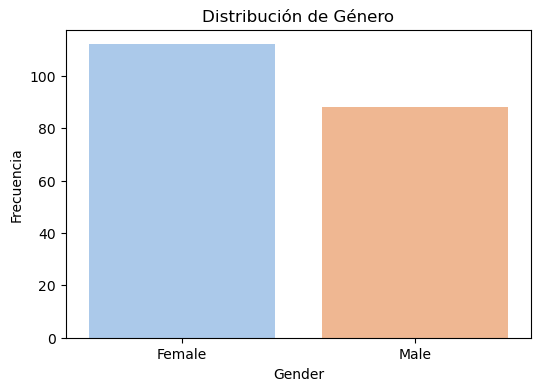

In [445]:
# Gráfico de barras para variable Gender o Género
plt.figure(figsize=(6,4))
sns.barplot(x=conteo.index, y=conteo.values, palette="pastel")
plt.xlabel("Gender")
plt.ylabel("Frecuencia")
plt.title("Distribución de Género")
plt.show()

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

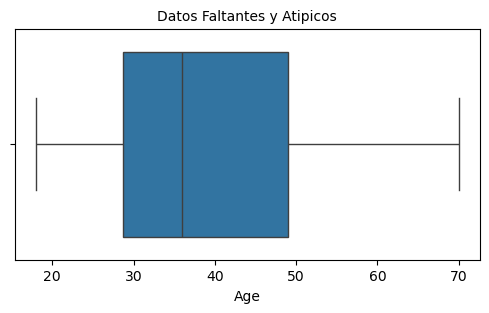

In [447]:
# Identificacion de datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)


Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

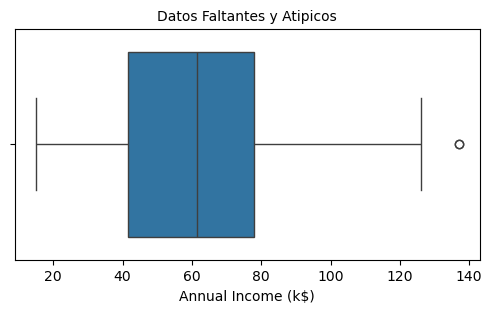

In [449]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

Text(0.5, 1.0, 'Datos Faltantes y Atipicos')

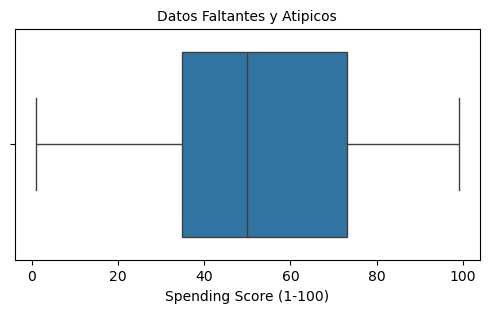

In [453]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Datos Faltantes y Atipicos', fontsize=10)

In [455]:
#Identificamos valores nulos en los datos
Datos.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [457]:
# Eliminamos variable 'CustomerID' y conservamos las variables a emplear
Datos.drop(columns='CustomerID', inplace=True)

In [461]:
# Cambiar los valores de la columna 'genero' a números
Datos['Gender'] = Datos['Gender'].map({'Female': 0, 'Male': 1})

In [463]:
Datos.head(7)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6


<Axes: >

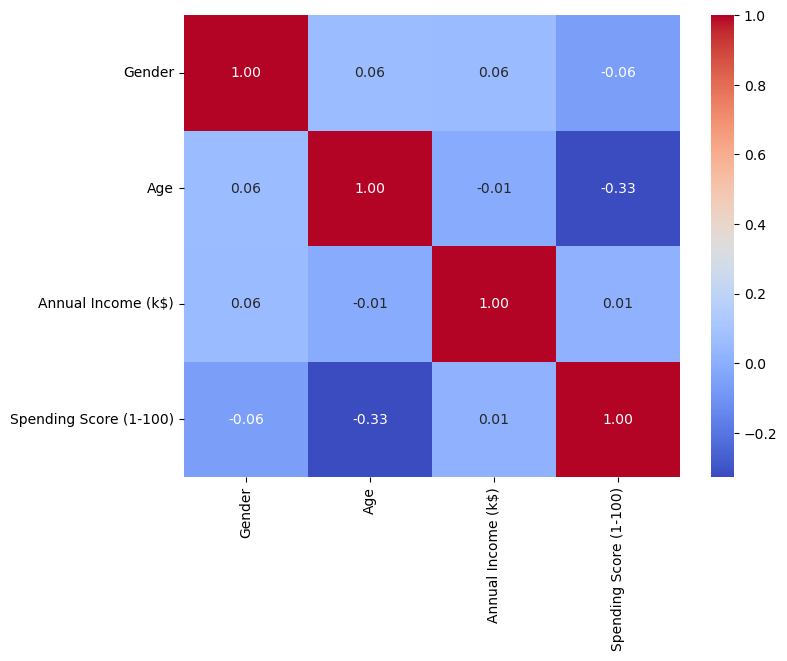

In [465]:
# Graficar las relaciones entre variables con un mapa de calor
plt.figure(figsize=(8, 6))  # Tamaño de la figura
sns.heatmap(Datos.corr(), annot=True, cmap='coolwarm', fmt='.2f')

In [467]:
# Entrenar el modelo 
# Estandarizar los datos antes de aplicar el modelo
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Datos), columns = Datos.columns)
X


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [469]:
#Revision de los datos de las variables objetivo
Datos.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


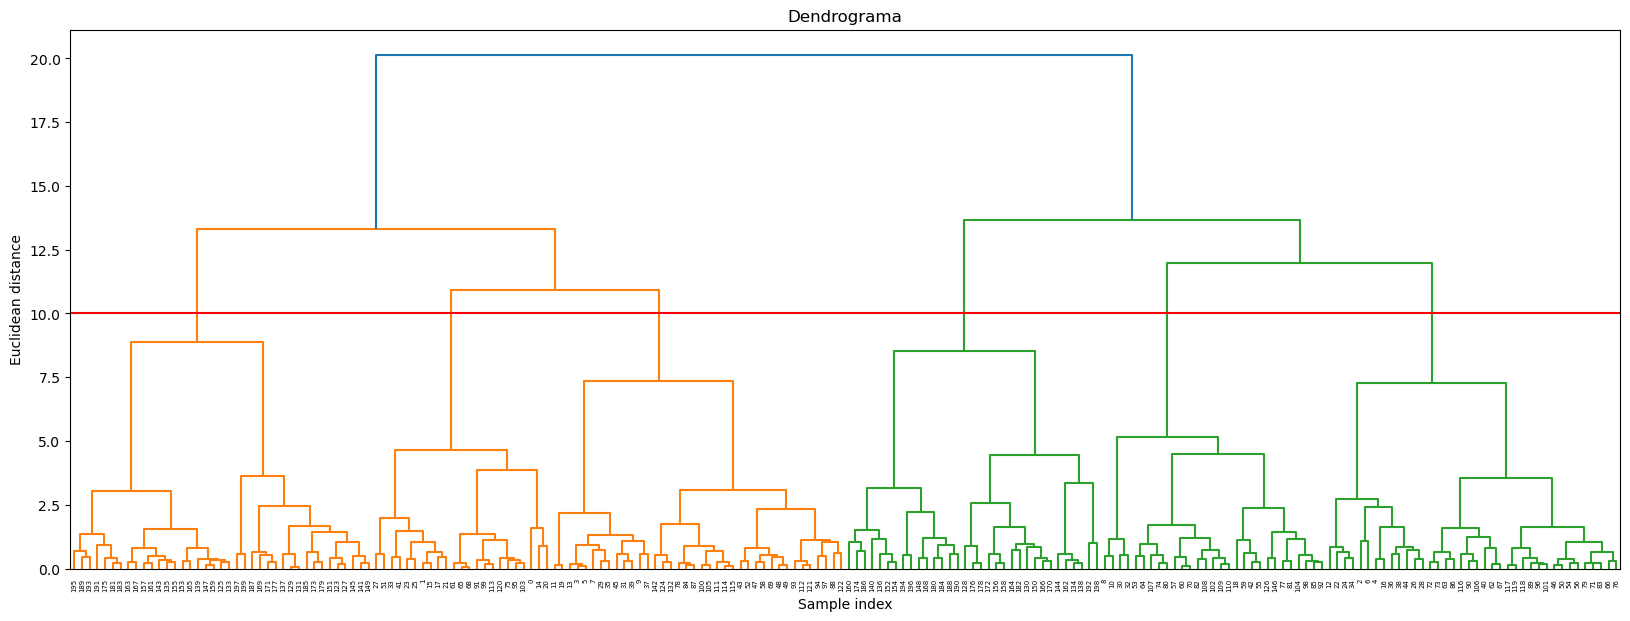

In [471]:
ward_clustering = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(20, 7))
dendrogram(ward_clustering)
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.title('Dendrograma')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')
plt.show()

In [473]:
hier_clustering = AgglomerativeClustering(n_clusters=6)
labels_hier = hier_clustering.fit_predict(X)
labels_hier


array([5, 5, 3, 1, 3, 1, 3, 1, 4, 1, 4, 1, 3, 1, 5, 5, 3, 5, 4, 1, 5, 5,
       3, 5, 3, 5, 3, 5, 3, 1, 4, 1, 4, 5, 3, 1, 3, 1, 3, 1, 3, 5, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 5, 1, 4, 3, 4, 3, 4, 1, 4, 4, 5, 3, 3, 4, 5,
       3, 3, 5, 1, 4, 3, 3, 3, 4, 5, 3, 4, 1, 3, 4, 4, 4, 3, 1, 4, 3, 1,
       1, 3, 3, 5, 4, 1, 1, 5, 3, 1, 4, 5, 1, 3, 4, 5, 4, 1, 3, 4, 4, 4,
       4, 1, 1, 5, 1, 1, 3, 3, 3, 3, 5, 1, 1, 0, 1, 0, 4, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int64)

In [475]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = labels_hier
colores=['red', 'blue', 'green', 'yellow', 'purple', 'black']
asignar=[]
for row in labels:
    asignar.append(colores[row]) 

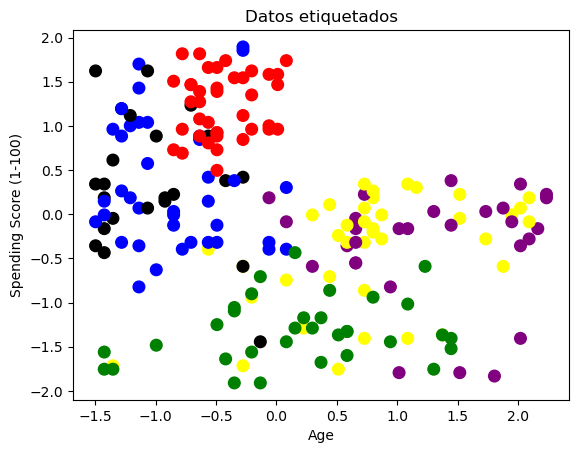

In [477]:
f1 = X['Age'].values
f2 = X['Spending Score (1-100)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.title('Datos etiquetados')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


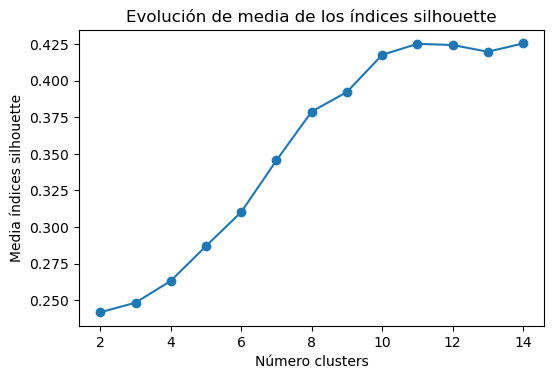

In [479]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []
for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    metric   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )
    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');


In [481]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3102445968526053
Índice de Calinski-Harabasz: 70.22708890672489
Davies-Bouldin Index: 1.0729080656431615


In [483]:
hier_clustering = AgglomerativeClustering(n_clusters=8)
labels_hier = hier_clustering.fit_predict(X)
labels_hier

array([2, 2, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 1, 0, 2, 2, 1, 2, 4, 0, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 0, 4, 0, 4, 2, 1, 0, 1, 0, 1, 0, 1, 2, 4, 0,
       1, 0, 1, 0, 0, 0, 1, 2, 0, 4, 1, 4, 1, 4, 0, 4, 4, 2, 1, 1, 4, 2,
       1, 1, 2, 0, 4, 1, 1, 1, 4, 2, 1, 4, 0, 1, 4, 4, 4, 1, 0, 4, 1, 0,
       0, 1, 1, 2, 4, 0, 0, 2, 1, 0, 4, 2, 0, 1, 4, 2, 4, 0, 1, 4, 4, 4,
       4, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 5, 0, 6, 4, 5, 3, 5, 3, 5,
       0, 6, 3, 6, 7, 5, 3, 6, 7, 5, 0, 6, 3, 5, 4, 6, 7, 5, 3, 5, 7, 6,
       7, 6, 3, 6, 3, 6, 7, 6, 3, 6, 3, 6, 3, 6, 7, 5, 3, 5, 3, 5, 7, 6,
       3, 5, 3, 5, 7, 6, 3, 6, 7, 5, 7, 5, 7, 6, 7, 6, 3, 6, 7, 6, 7, 5,
       3, 5], dtype=int64)

In [485]:
# Calcular medidas de calidad para Clustering Jerárquico
print("\nMedidas de calidad para Clustering Jerárquico:")
print("Puntaje de silueta:", metrics.silhouette_score(X, labels_hier))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(X, labels_hier))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X, labels_hier))


Medidas de calidad para Clustering Jerárquico:
Puntaje de silueta: 0.3788796050129373
Índice de Calinski-Harabasz: 77.54614229218767
Davies-Bouldin Index: 0.9678935716449804


In [487]:
# Calcular el coeficiente de correlación cofenética
from scipy.cluster.hierarchy import linkage
# Compute the distances
X_dist = pdist(X)
# Compute the linkage matrix
Z = linkage(X, 'ward')
# Calculate the cophenetic correlation coefficient
coef_cofenetico = cophenet(Z, X_dist)
print("Coeficiente de correlación cofenética:", coef_cofenetico)

Coeficiente de correlación cofenética: (0.5956238167278256, array([ 4.64278735, 20.11762535, 10.9330832 , ..., 20.11762535,
        0.5647686 , 20.11762535]))
